In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 4: XGBoost

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("../data/processed/simple.csv")
df

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Smoking_encoder,Weight_encoder
0,1,19,0,1.0,0.0,1.0,0.0,0.0
1,2,43,0,0.0,0.0,1.0,0.0,0.0
2,1,26,0,0.0,0.0,1.0,0.0,1.0
3,1,46,0,1.0,1.0,1.0,0.0,0.0
4,1,30,1,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
994,0,33,1,1.0,0.0,1.0,1.0,1.0
995,0,47,0,1.0,1.0,0.0,0.0,1.0
996,1,20,1,0.0,1.0,1.0,1.0,1.0
997,1,32,1,0.0,1.0,1.0,1.0,1.0


## TRAIN/TEST

In [3]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 7)
(799,)
(200, 7)
(200,)


## Entrenar Modelo

In [5]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # eval_metric depende del caso
model.fit(X_train, y_train)

C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Predecir

In [6]:
y_pred = model.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.54      0.55       101
           1       0.55      0.57      0.56        99

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.55       200



<Axes: >

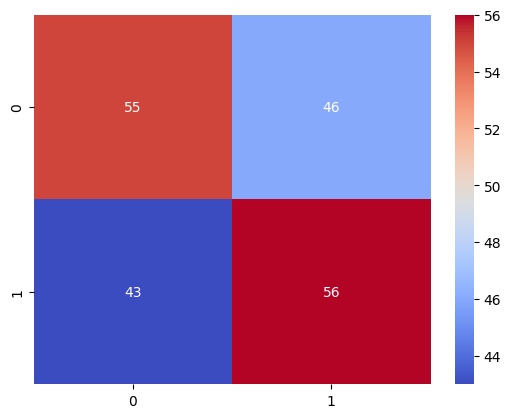

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = "coolwarm",annot= True)

## Cross validation

In [9]:
# Crear el modelo
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Calcular puntuaciones de validación cruzada (por defecto usa accuracy)
scores = cross_val_score(model, X, y, cv=5)  # 5 folds

print("Scores por fold:", scores)
print("Media:", scores.mean())
print("Desviación estándar:", scores.std())


C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

Scores por fold: [0.54       0.525      0.515      0.545      0.51256281]
Media: 0.5275125628140703
Desviación estándar: 0.013023968169305363


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid,
                           cv=5,
                           scoring='f1')
grid_search.fit(X, y)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Mejor puntuación: 0.5333933391888199


C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### PKL

In [11]:
import pickle

ruta = ("../models/M4B_XGBoost.pkl")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  
model.fit(X_train, y_train)

# Guardar el modelo en un archivo pkl
with open(ruta, 'wb') as f:
    pickle.dump(model, f)

C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
ruta = "../models/M4B_XGBoost.pkl"

# Abrir y cargar el modelo desde el archivo pickle
with open(ruta, 'rb') as f:
    modelo_xgb_cargado = pickle.load(f)


In [13]:
#Usar el modelo cargado para hacer predicciones:
y_pred = modelo_xgb_cargado.predict(X_test)


# STREAMLIT

In [14]:
import streamlit as st


# Cargar el modelo
with open("../models/M4B_XGBoost.pkl", "rb") as f:
    model = pickle.load(f)

st.title("¿Vas a perder el pelo? 🤔")

st.markdown("Introduce tus datos para saber si tienes riesgo de pérdida de cabello.")

# Entradas del usuario (ajusta estas variables según las que usaste para entrenar)
Stress = st.selectbox("Nivel de estrés", ["Bajo", "Medio", "Alto"])
Age = st.slider("Edad", 10, 80, 30)
Genetics_encoder = st.selectbox("¿Tiene factores genéticos?", ["Sí", "No"])
Hormones_encoder = st.selectbox("¿Tiene problemas hormonales?", ["Sí", "No"])
HairCare_encoder = st.selectbox("¿Se cuida poco el cabello?", ["Sí", "No"])
Smoking_encoder = st.selectbox("¿Fuma?", ["Sí", "No"])
Weight_encoder = st.selectbox("¿Ha perdido peso?", ["Sí", "No"])

# Convertir respuestas a binario
def binarize(resp):
    return 1 if resp == "Sí" else 0

def Stress_to_num(level):
    mapping = {"Bajo": 0, "Medio": 1, "Alto": 2}
    return mapping[level]

Stress = Stress_to_num(Stress)
Genetics_encoder = binarize(Genetics_encoder)
Hormones_encoder = binarize(Hormones_encoder)
HairCare_encoder = binarize(HairCare_encoder)
Smoking_encoder = binarize(Smoking_encoder)
Weight_encoder = binarize(Weight_encoder)

# Preparar entrada para el modelo
input_data = np.array([[Stress, Age, Genetics_encoder, Hormones_encoder, HairCare_encoder, Smoking_encoder, Weight_encoder]])

# Botón de predicción
if st.button("Predecir"):
    prediction = model.predict(input_data)[0]
    if prediction == 1:
        st.error("😬 Riesgo de pérdida de cabello")
    else:
        st.success("😊 Sin riesgo aparente de pérdida de cabello")


2025-07-05 22:07:35.734 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:07:37.051 
  command:

    streamlit run C:\Users\nerea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-05 22:07:37.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:07:37.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:07:37.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:07:37.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:07:37.056 Thread 'MainThread': missing ScriptRunContext! This w